In [2]:
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import numpy as np

In [36]:
df = pd.read_csv('exports-calendar-year.csv')
selected_countries = ['Brazil', 'Viet Nam', 'Colombia', 'Indonesia', 'Ethiopia', 'Honduras']
df = df[df['exports'].isin(selected_countries)]

country_y_positions = {
    'Brazil': 600,
    'Viet Nam': 500,
    'Colombia': 400,
    'Indonesia': 300,
    'Ethiopia': 200,
    'Honduras': 100
}
df['CountryIndex'] = df['exports'].map(country_y_positions)

df_long = df.melt(id_vars=['exports', 'CountryIndex'], var_name='Year', value_name='ExportVolume')
df_long['Year'] = df_long['Year'].astype(int)
df_long = df_long[df_long['Year'] <= 2013]

fig = px.scatter(df_long, x='Year', y='CountryIndex', size='ExportVolume', color='ExportVolume',
                 hover_name='exports', animation_frame='Year',
                 size_max=60, range_x=[df_long['Year'].min(), df_long['Year'].max()])

fig.update_yaxes(tickvals=list(country_y_positions.values()), ticktext=list(country_y_positions.keys()))

fig.show()

In [6]:
df = pd.read_csv("disappearance.csv")
df.rename(columns={'disappearance': 'Countries', 'Volume': 'ImportVolume [Tonnes]'}, inplace=True)

df_long = df.melt(id_vars='Countries', var_name='Year', value_name='ImportVolume [Tonnes]')
df_long['Year'] = df_long['Year'].astype(int)

df_long = df_long.dropna(subset=['ImportVolume [Tonnes]'])
df_long = df_long[df_long['Year'] <= 2013]

top5_per_year = df_long.groupby('Year').apply(lambda x: x.nlargest(5, 'ImportVolume [Tonnes]')).reset_index(drop=True)

fig = px.bar(top5_per_year, x='ImportVolume [Tonnes]', y='Countries', color='Countries',
             animation_frame='Year', range_x=[0, top5_per_year['ImportVolume [Tonnes]'].max()],
             orientation='h')

fig.update_yaxes(title_text='Countries', title_standoff=25)

fig.update_layout(showlegend=False)

fig.show()
fig.write_html("second_graph.html")

In [40]:
df = pd.read_csv('exports-calendar-year.csv')

selected_countries = ['Brazil', 'Viet Nam', 'Colombia', 'Indonesia', 'Ethiopia', 'Honduras']
df.rename(columns={"exports":"Countries"}, inplace=True)
df = df[df['Countries'].isin(selected_countries)]

df_long = df.melt(id_vars='Countries', var_name='Year', value_name='Export by Volume')
df_long['Year'] = df_long['Year'].astype(int)

df_long = df_long[df_long['Year'] <= 2013]

fig = px.bar(df_long, x='Countries', y='Export by Volume', color='Countries',
             animation_frame='Year', range_y=[0, df_long['Export by Volume'].max()])

fig.update_layout(showlegend=False)

fig.show()
fig.write_html("first_graph.html")

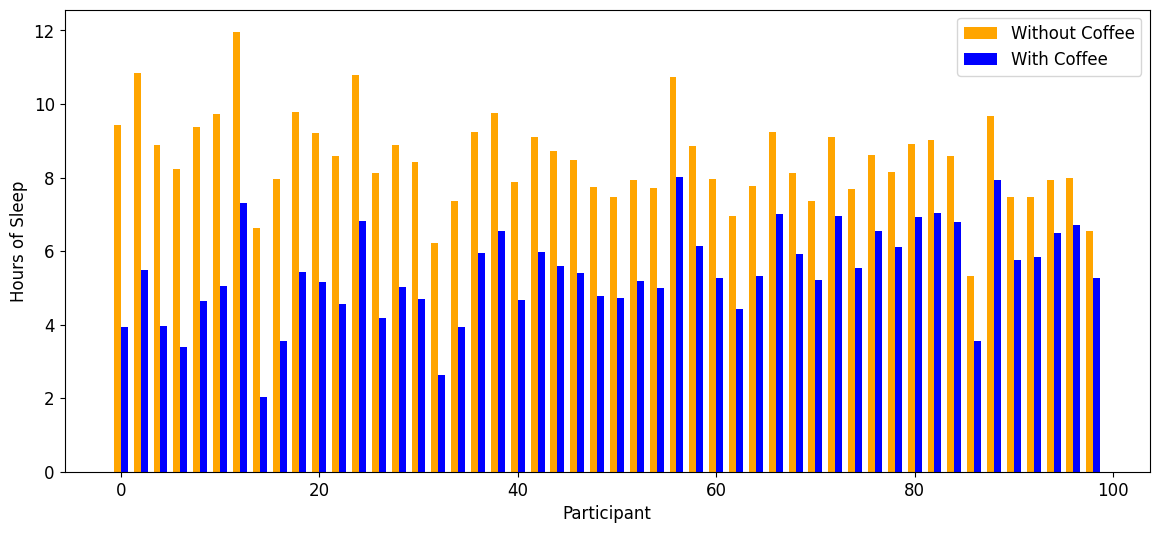

In [9]:
sleep_data = pd.read_csv('sleep_minutes_evident_dataset.csv')

sleep_data['Sleep_Difference'] = sleep_data['Caffeine_Avoidance_Sleep_Minutes'] - sleep_data['Coffee_Consumption_Sleep_Minutes']

# Filtra i partecipanti
participants_more_sleep_no_caffeine = sleep_data[sleep_data['Sleep_Difference'] > 0]

# Prendi i primi 50
top_50_more_sleep_no_caffeine = participants_more_sleep_no_caffeine.nlargest(50, 'Sleep_Difference')

# Converti i minuti in ore
top_50_more_sleep_no_caffeine['Caffeine_Avoidance_Sleep_Minutes'] /= 60
top_50_more_sleep_no_caffeine['Coffee_Consumption_Sleep_Minutes'] /= 60

index_top_50 = np.arange(len(top_50_more_sleep_no_caffeine)) * 2  # Spacing the bars more
bar_width = 0.7

color_without_coffee = '#ffa500'   # Colore per "Without Coffee"
color_with_coffee = 'blue'      # Colore per "With Coffee"

fig, ax = plt.subplots(figsize=(14, 6))
ax.bar(index_top_50 - bar_width/2, top_50_more_sleep_no_caffeine['Caffeine_Avoidance_Sleep_Minutes'], bar_width, label='Without Coffee', color=color_without_coffee)
ax.bar(index_top_50 + bar_width/2, top_50_more_sleep_no_caffeine['Coffee_Consumption_Sleep_Minutes'], bar_width, label='With Coffee', color=color_with_coffee)

fontsize = 12

ax.set_xlabel('Participant', fontsize=fontsize)
ax.set_ylabel('Hours of Sleep', fontsize=fontsize)
ax.legend(fontsize=fontsize)
ax.tick_params(axis='both', which='major', labelsize=fontsize)

plt.savefig("third_graph.png")
plt.show()


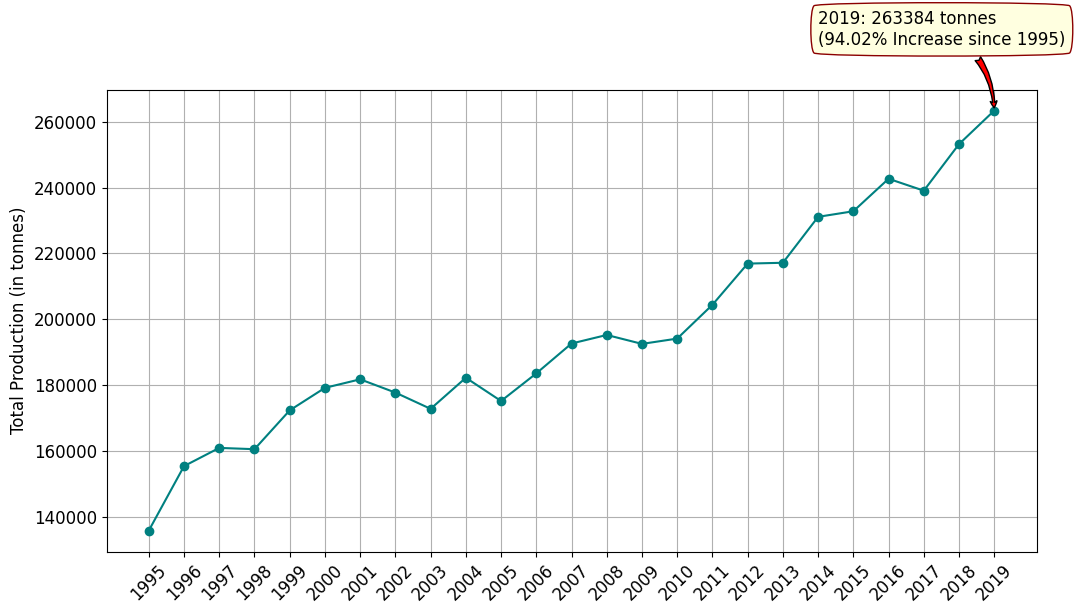

In [32]:
coffee_data = pd.read_csv("coffee_exports.csv")

selected_years = coffee_data.columns[6:-1]
total_production_selected_years = coffee_data[selected_years].sum()

increase_selected_years = total_production_selected_years.iloc[-1] - total_production_selected_years.iloc[0]
percentage_increase_selected_years = (increase_selected_years / total_production_selected_years.iloc[0]) * 100

plt.figure(figsize=(12, 6))
plt.plot(selected_years, total_production_selected_years, marker='o', linestyle='-', color='teal')

fontsize = 12

plt.ylabel('Total Production (in tonnes)', fontsize=fontsize)
plt.xticks(rotation=45, fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.grid(True)

if len(selected_years) >= 6:
    xytext_position = (selected_years[-6], total_production_selected_years.iloc[-1] + 20000)
else:
    xytext_position = (selected_years[0], total_production_selected_years.iloc[-1] + 20000)

plt.annotate(f"2019: {total_production_selected_years.iloc[-1]} tonnes\n({percentage_increase_selected_years:.2f}% Increase since 1995)",
             xy=(selected_years[-1], total_production_selected_years.iloc[-1]),
             xytext=xytext_position,
             arrowprops=dict(facecolor='red', arrowstyle='fancy', connectionstyle='arc3,rad=-0.3'),
             bbox=dict(boxstyle="round4,pad=0.5", edgecolor="darkred", facecolor="lightyellow"),
             fontsize=fontsize)

plt.savefig("fourth_graph.png", bbox_inches='tight', pad_inches=0.3)
plt.show()


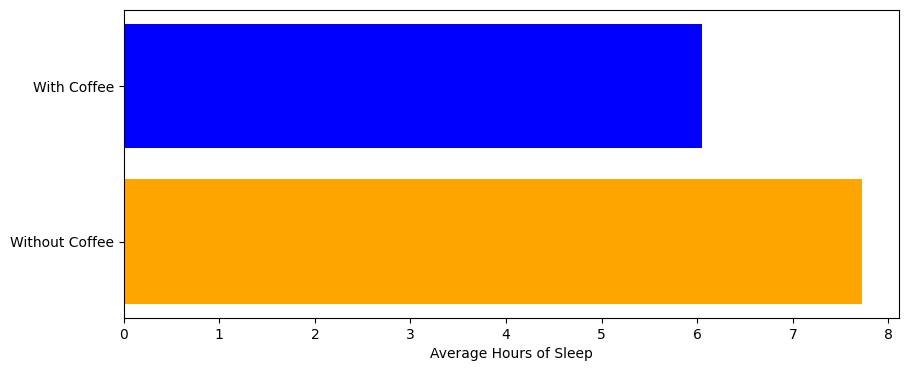

In [10]:
mean_sleep_no_caffeine_hours = sleep_data['Caffeine_Avoidance_Sleep_Minutes'].mean() / 60
mean_sleep_with_caffeine_hours = sleep_data['Coffee_Consumption_Sleep_Minutes'].mean() / 60

fig, ax = plt.subplots(figsize=(10, 4))
mean_values_hours = [mean_sleep_no_caffeine_hours, mean_sleep_with_caffeine_hours]
bar_labels_hours = ['Without Coffee', 'With Coffee']

ax.barh(bar_labels_hours, mean_values_hours, color=['#ffa500', 'blue'])

ax.set_xlabel('Average Hours of Sleep')

plt.savefig("fifth_graph.png")
plt.show()